In [1]:
from keras.datasets import imdb
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)


In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
 [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [9]:
import numpy as np

def vectorize_sequences(seq, dimension=10000):
    
    results = np.zeros((len(seq), dimension))
    
    for i, data in enumerate(seq):
        results[i, data] = 1
    return results
    

In [10]:
train_datan = vectorize_sequences(train_data)
test_datan = vectorize_sequences(test_data)
train_labelsn = np.asarray(train_labels).astype('float32')
test_labelsn = np.asarray(test_labels).astype('float32')

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [13]:
from keras import losses,optimizers
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
 loss=losses.binary_crossentropy,
 metrics=[metrics.binary_accuracy])

In [14]:
history = model.fit(
    train_datan,
    train_labelsn,
    epochs=15,
    batch_size=20,
    validation_data=(test_datan, test_labelsn))


Epoch 1/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.3211 - binary_accuracy: 0.8703 - val_loss: 0.2805 - val_binary_accuracy: 0.8882
Epoch 2/15
1250/1250 [==============================] - 3s 3ms/step - loss: 0.2186 - binary_accuracy: 0.9170 - val_loss: 0.3078 - val_binary_accuracy: 0.8797
Epoch 3/15
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1877 - binary_accuracy: 0.9298 - val_loss: 0.3033 - val_binary_accuracy: 0.8832
Epoch 4/15
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1696 - binary_accuracy: 0.9376 - val_loss: 0.3332 - val_binary_accuracy: 0.8775
Epoch 5/15
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1554 - binary_accuracy: 0.9444 - val_loss: 0.3470 - val_binary_accuracy: 0.8791
Epoch 6/15
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1432 - binary_accuracy: 0.9502 - val_loss: 0.3569 - val_binary_accuracy: 0.8760
Epoch 7/15
1250/1250 [=============================

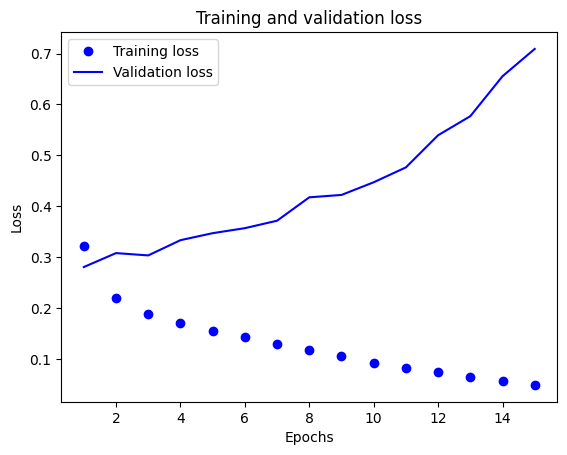

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

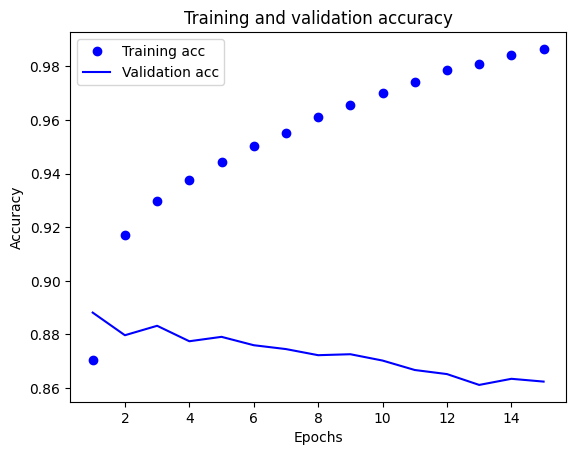

In [16]:
plt.clf()
history_dict = history.history
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
 [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) 